#Git

In [88]:
!git config --global user.email "erfan.alerom@gmail.com"
!git config --global user.name "erythm"

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/extention.ipynb' /content/askqe/

In [ ]:
!git add extention.ipynb

In [ ]:
!git commit -m "Add .ipynb && start the baseline with Qwen 2.5 7B"

[main f09f9fb] Add .ipynb && start the baseline with Qwen 2.5 7B
 1 file changed, 1 insertion(+)
 create mode 100644 extention.ipynb


In [ ]:
!git remote set-url origin https://@github.com/erythm/askqe.git
!git push origin main

Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 40.31 KiB | 5.76 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/erythm/askqe.git
   c0a0c05..f09f9fb  main -> main


#Binary AskQE Extension  
Pipeline: SRL / OpenIE / Dependency /NER

In [ ]:
!git clone https://github.com/erythm/askqe.git

Cloning into 'askqe'...
remote: Enumerating objects: 1122, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 1122 (delta 15), reused 8 (delta 6), pack-reused 1102 (from 2)
Receiving objects: 100% (1122/1122), 52.49 MiB | 18.98 MiB/s, done.
Resolving deltas: 100% (887/887), done.
Updating files: 100% (1038/1038), done.


In [ ]:
%cd askqe

/content/askqe


In [ ]:
%cd ..

/content


# Requirments

In [ ]:
# Install necessary libraries
!pip install -q vllm
!pip install -q sentence-transformers sacrebleu deep_translator nltk
!pip install -q "transformers>=4.56.0,<5.0.0"
!pip install -q spacy
!python -m spacy download en_core_web_sm
print("✅ All libraries installed!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.9/474.9 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.0/355.0 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 120.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 123.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 132.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0

#Repository Imports

In [ ]:
import sys
import os
import importlib.util

REPO_PATH = "askqe"

# Add repository paths to Python path
sys.path.insert(0, REPO_PATH)
sys.path.insert(0, f"{REPO_PATH}/QG/code")
sys.path.insert(0, f"{REPO_PATH}/QA/code")
sys.path.insert(0, f"{REPO_PATH}/biomqm/askqe")
sys.path.insert(0, f"{REPO_PATH}/evaluation/string-comparison")

# --- Import Prompts from Repository ---
from QG.code.prompt import nli as qg_nli_prompt
from QG.code.prompt import vanilla as qg_vanilla_prompt
from QG.code.prompt import prompts as qg_prompts

from QA.code.prompt import qa_prompt

from biomqm.askqe.prompt import atomic_fact_prompt
from biomqm.askqe.prompt import nli as biomqm_nli_prompt

# --- Import utils using importlib ---
utils_path = f"{REPO_PATH}/evaluation/string-comparison/utils.py"
spec = importlib.util.spec_from_file_location("utils_module", utils_path)
utils_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(utils_module)

# Assign functions
repo_f1_score = utils_module.f1_score
repo_exact_match_score = utils_module.exact_match_score
repo_chrf_score = utils_module.chrf_score
repo_bleu_score = utils_module.bleu_score
repo_compare_answers = utils_module.compare_answers
normalize_answer = utils_module.normalize_answer

print("✅ Repository imports loaded successfully!")
print(f"   - QG prompts: vanilla, nli, srl")
print(f"   - QA prompt: qa_prompt")
print(f"   - Atomic fact prompt: atomic_fact_prompt")
print(f"   - Scoring functions: f1_score, exact_match_score, chrf_score, bleu_score")

atomic_fact_prompt_template = atomic_fact_prompt
qg_prompt_template = qg_nli_prompt
qa_prompt_template = qa_prompt

print("\n✅ Prompt templates configured:")
print(f"   atomic_fact_prompt_template = biomqm/askqe/prompt.py::atomic_fact_prompt")
print(f"   qg_prompt_template = QG/code/prompt.py::nli (best config per paper)")
print(f"   qa_prompt_template = QA/code/prompt.py::qa_prompt")

✅ Repository imports loaded successfully!
   - QG prompts: vanilla, nli, srl
   - QA prompt: qa_prompt
   - Atomic fact prompt: atomic_fact_prompt
   - Scoring functions: f1_score, exact_match_score, chrf_score, bleu_score

✅ Prompt templates configured:
   atomic_fact_prompt_template = biomqm/askqe/prompt.py::atomic_fact_prompt
   qg_prompt_template = QG/code/prompt.py::nli (best config per paper)
   qa_prompt_template = QA/code/prompt.py::qa_prompt


## Load Qwen2.5-3B Model with vLLM

In [ ]:
import os
os.environ["VLLM_WORKER_MULTIPROC_METHOD"] = "spawn"

from vllm import LLM, SamplingParams

# Configuration for vLLM with AWQ quantization
MODEL_ID = "Qwen/Qwen2.5-7B-Instruct-AWQ"

print(f"Loading model with vLLM: {MODEL_ID}...")

try:
    llm = LLM(
        model=MODEL_ID,
        quantization="awq",
        dtype="half",
        trust_remote_code=True,
        max_model_len=2048,
        enforce_eager=True,  # Disables CUDA graph for better Colab compatibility
        gpu_memory_utilization=0.7
    )
    print("✅ vLLM Model loaded successfully!")
except Exception as e:
    print(f"❌ Error loading with vLLM: {e}")
    print("Please ensure vLLM is properly installed and GPU is available.")

Loading model with vLLM: Qwen/Qwen2.5-7B-Instruct-AWQ...
INFO 12-27 11:20:16 [utils.py:253] non-default args: {'trust_remote_code': True, 'dtype': 'half', 'max_model_len': 2048, 'gpu_memory_utilization': 0.7, 'disable_log_stats': True, 'quantization': 'awq', 'enforce_eager': True, 'model': 'Qwen/Qwen2.5-7B-Instruct-AWQ'}


The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

INFO 12-27 11:20:34 [model.py:514] Resolved architecture: Qwen2ForCausalLM
INFO 12-27 11:20:34 [model.py:1661] Using max model len 2048
INFO 12-27 11:20:38 [scheduler.py:230] Chunked prefill is enabled with max_num_batched_tokens=8192.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Parse safetensors files:   0%|          | 0/2 [00:00<?, ?it/s]

WARNING 12-27 11:20:38 [vllm.py:622] Enforce eager set, overriding optimization level to -O0
INFO 12-27 11:20:38 [vllm.py:722] Cudagraph is disabled under eager mode


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

generation_config.json:   0%|          | 0.00/243 [00:00<?, ?B/s]

INFO 12-27 11:25:21 [llm.py:360] Supported tasks: ['generate']
✅ vLLM Model loaded successfully!


#Helper functions

In [ ]:
SAMPLING_PARAMS = SamplingParams(
    temperature=0.3,
    top_p=0.95,
    max_tokens=512,
    stop=["```", "<|im_end|>"]
)

def generate_text_batch(prompts, sampling_params=SAMPLING_PARAMS):
    if not prompts:
        return []

    if llm is None:
        raise RuntimeError("vLLM model is not loaded (llm is None). Load the model before calling generate_text_batch().")

    formatted_prompts = [
        f"<|im_start|>user\n{p}<|im_end|>\n<|im_start|>assistant\n"
        for p in prompts
    ]

    outputs = llm.generate(formatted_prompts, sampling_params)

    generated_texts = []
    for output in outputs:
        text = output.outputs[0].text.strip()
        generated_texts.append(text)

    return generated_texts


def parse_list_output(text):
    """Parses a string representation of a list into a Python list."""
    import ast
    import re

    try:
        # Clean up the text
        text = text.strip()

        # Find the list part
        start = text.find('[')
        end = text.rfind(']') + 1

        if start != -1 and end > start:
            candidate = text[start:end]
            result = ast.literal_eval(candidate)
            if isinstance(result, list):
                return result
        return []
    except Exception as e:
        # Debug: uncomment to see parsing errors
        # print(f"Parse error: {e}, text: {text[:100]}")
        return []

print("✅ Helper functions defined!")

✅ Helper functions defined!


#Load Dataset (BIOMQM)

In [ ]:
import json
import os
import glob

# --- Configuration ---
DATASET_TO_USE = "biomqm"
CONTRATICO_LANG_PAIR = "en-es"  # unused here, kept for future use / consistency
REPO_PATH = "askqe"

def calculate_mqm_score(errors):
    """
    Simple penalty-based MQM-like score:
      Minor=1, Major=5, Critical=25
    Final score: 100 - sum(penalties), floored at 0
    """
    weights = {"Minor": 1, "Major": 5, "Critical": 25}
    score_penalty = 0

    if not errors:
        return 100

    for error in errors:
        severity = (error or {}).get("severity", "Minor")
        score_penalty += weights.get(severity, 1)

    return max(0, 100 - score_penalty)

def get_max_severity(errors):
    """
    BIOMQM-style: pick the worst severity present.
    """
    if not errors:
        return "No Error"

    severities = []
    for e in errors:
        if e is None:
            continue
        severities.append(e.get("severity", "Minor"))

    if "Critical" in severities:
        return "Critical"
    if "Major" in severities:
        return "Major"
    return "Minor"

def load_biomqm_data(file_path, limit=None):
    data_entries = []

    if not os.path.exists(file_path):
        print(f"❌ Error: File not found: {file_path}")
        return []

    try:
        with open(file_path, "r", encoding="utf-8") as f:
            for i, line in enumerate(f):
                if limit is not None and i >= limit:
                    break

                line = line.strip()
                if not line:
                    continue

                item = json.loads(line)

                # --- robust key access (BIOMQM jsonl variants can differ) ---
                src = item.get("src", "")
                bt = item.get("bt_tgt", item.get("bt", item.get("backtranslation", "")))
                errors = item.get("errors_tgt", item.get("errors", []))

                # id handling: doc_id may exist but can repeat; keep stable + unique fallback
                base_id = item.get("doc_id", item.get("id", f"row_{i}"))
                entry_id = f"{base_id}:{i}" if base_id == "doc_id" else base_id

                entry = {
                    "id": base_id if base_id else f"row_{i}",
                    "source": src,
                    "backtranslation": bt,
                    "errors": errors if errors else [],
                    "mqm_score": calculate_mqm_score(errors if errors else []),
                    "severity": get_max_severity(errors if errors else [])
                }

                data_entries.append(entry)

        print(f"✅ Loaded {len(data_entries)} entries from BIOMQM successfully.")
        return data_entries

    except json.JSONDecodeError as e:
        print(f"❌ JSON decode error while reading {file_path}: {e}")
        return []
    except Exception as e:
        print(f"❌ Unexpected error while loading BIOMQM: {e}")
        return []

# --- Load dataset ---
if DATASET_TO_USE == "biomqm":
    BIOMQM_FILE = f"{REPO_PATH}/biomqm/dev_with_backtranslation.jsonl"
    dataset = load_biomqm_data(BIOMQM_FILE, limit=100)
else:
    print(f"❌ Unknown dataset: {DATASET_TO_USE}")
    dataset = []

# --- Better preview ---
if dataset:
    import pandas as pd

    df_preview = pd.DataFrame(dataset)

    print("\n📊 Dataset Overview:")
    print(f"   Total samples: {len(dataset)}")

    if "severity" in df_preview.columns:
        print(f"\n📈 Severity Distribution:")
        print(df_preview["severity"].value_counts(dropna=False))
    else:
        print("\n⚠️ No 'severity' column found in dataset preview.")

    cols_to_show = [c for c in ["id", "severity", "mqm_score", "source"] if c in df_preview.columns]

    print("\n📋 First 5 Samples:")
    print(df_preview[cols_to_show].head())

    print("\n🔍 Example Entry (Full):")
    print(json.dumps(dataset[0], indent=2, ensure_ascii=False))
else:
    print("⚠️ Dataset is empty. Nothing to preview.")

✅ Loaded 100 entries from BIOMQM successfully.

📊 Dataset Overview:
   Total samples: 100

📈 Severity Distribution:
severity
No Error    39
Major       33
Minor       28
Name: count, dtype: int64

📋 First 5 Samples:
      id severity  mqm_score  \
0  doc11    Major         95   
1  doc11    Minor         99   
2  doc11    Major         95   
3  doc11    Minor         99   
4  doc11    Minor         99   

                                              source  
0  Three cases of cervicofacial NF are presented ...  
1  Two of the three patients died within 48 h fro...  
2  Rapid progression and systemic illness are typ...  
3  After diagnosing NF based on clinical symptoms...  
4  After diagnosing NF based on clinical symptoms...  

🔍 Example Entry (Full):
{
  "id": "doc11",
  "source": "Three cases of cervicofacial NF are presented in this case report.",
  "backtranslation": "This case report presents three cases of cervicofacial NF.",
  "errors": [
    {
      "term": "zervikofazialem",

In [76]:
# ============================================
# 📂 CELL 6: Load Atomic Facts Dataset
# ============================================

import json
import os

ATOMIC_FACTS_FILE = "/content/askqe_atomic_facts_filtered.jsonl"
MAX_SAMPLES = 100

def load_atomic_facts(file_path, limit=None):
    """Load atomic facts from filtered JSONL file."""
    data = []

    if not os.path.exists(file_path):
        print(f"❌ File not found: {file_path}")
        return []

    with open(file_path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f):
            if limit and i >= limit:
                break

            item = json.loads(line.strip())

            # Extract required fields
            entry = {
                "id": item.get("id", f"row_{i}"),
                "source": item.get("src", ""),
                "backtranslation": item.get("bt_tgt", item.get("bt", "")),
                "atomic_facts": item.get("atomic_facts", []),
                "errors": item.get("errors_tgt", item.get("errors", [])),
            }

            # Calculate severity
            errors = entry["errors"]
            if not errors:
                entry["severity"] = "No Error"
                entry["mqm_score"] = 100
            else:
                severities = [e.get("severity", "Minor") for e in errors if e]
                if "Critical" in severities:
                    entry["severity"] = "Critical"
                    entry["mqm_score"] = 75
                elif "Major" in severities:
                    entry["severity"] = "Major"
                    entry["mqm_score"] = 95
                else:
                    entry["severity"] = "Minor"
                    entry["mqm_score"] = 99

            data.append(entry)

    print(f"✅ Loaded {len(data)} entries with atomic facts.")
    return data


# Load dataset
dataset = load_atomic_facts(ATOMIC_FACTS_FILE, limit=MAX_SAMPLES)

# Preview
if dataset:
    import pandas as pd
    df_preview = pd.DataFrame(dataset)

    print(f"\n📊 Dataset Overview:")
    print(f"   Total samples: {len(dataset)}")
    print(f"\n📈 Severity Distribution:")
    print(df_preview["severity"].value_counts())

    print(f"\n🔍 Example Entry:")
    print(f"   Source: {dataset[0]['source'][:80]}...")
    print(f"   BT: {dataset[0]['backtranslation'][:80]}...")
    print(f"   Atomic Facts: {dataset[0]['atomic_facts']}")
    print(f"   Severity: {dataset[0]['severity']}")

✅ Loaded 100 entries with atomic facts.

📊 Dataset Overview:
   Total samples: 100

📈 Severity Distribution:
severity
Minor       60
Critical    18
No Error    13
Major        9
Name: count, dtype: int64

🔍 Example Entry:
   Source: However, in the last years several step forwards in the field of precision medic...
   BT: However, in recent years steps have been taken in the field of precision medicin...
   Atomic Facts: ['Several steps forwards in the field of precision medicine have been made in the last years.', 'The last years have seen several advances in precision medicine.']
   Severity: Major


#Feature Extraction

##Load spaCy

In [24]:
import spacy

print("Loading spaCy...")
nlp = spacy.load("en_core_web_sm")
print("✅ spaCy loaded!")

Loading spaCy...
✅ spaCy loaded!


##Feature Extraction - SRL (Semantic Role Labeling)
Since AllenNLP conflicts with vLLM, we simulate SRL using spaCy dependency parsing.
Extracts: ARG0 (agent), ARG1 (patient), ARGM-NEG (negation), ARGM-TMP (time)

In [25]:
def extract_srl_features(doc):
    """
    Simulate SRL using spaCy dependency parsing.
    Returns list of frames: {verb, ARG0, ARG1, ARGM_NEG, ARGM_TMP, ARGM_LOC}
    """
    frames = []

    for token in doc:
        if token.pos_ == "VERB" and token.dep_ in ("ROOT", "relcl", "advcl", "ccomp", "xcomp"):
            frame = {
                "verb": token.lemma_,
                "verb_text": token.text,
                "ARG0": None,
                "ARG1": None,
                "ARGM_NEG": False,
                "ARGM_TMP": None,
                "ARGM_LOC": None,
            }

            for child in token.children:
                # ARG0: Subject (agent)
                if child.dep_ in ("nsubj",):
                    frame["ARG0"] = " ".join([t.text for t in child.subtree]).strip()

                # For passive: agent is in "by" phrase
                elif child.dep_ == "agent":
                    agent_text = " ".join([t.text for t in child.subtree]).strip()
                    # Remove "by " prefix
                    if agent_text.lower().startswith("by "):
                        agent_text = agent_text[3:].strip()
                    frame["ARG0"] = agent_text

                # ARG0 for passive subject (nsubjpass) - this is actually ARG1
                elif child.dep_ == "nsubjpass":
                    frame["ARG1"] = " ".join([t.text for t in child.subtree]).strip()

                # ARG1: Direct object
                elif child.dep_ in ("dobj", "obj"):
                    frame["ARG1"] = " ".join([t.text for t in child.subtree]).strip()

                # ARGM-NEG: Negation
                elif child.dep_ == "neg":
                    frame["ARGM_NEG"] = True

                # ARGM-TMP: Temporal
                elif child.dep_ in ("npadvmod", "advmod", "prep"):
                    child_text = " ".join([t.text for t in child.subtree]).strip()
                    if any(t.ent_type_ in ("DATE", "TIME") for t in child.subtree):
                        frame["ARGM_TMP"] = child_text
                    elif child.text.lower() in ("yesterday", "today", "tomorrow", "when", "while", "before", "after", "during"):
                        frame["ARGM_TMP"] = child_text

                # ARGM-LOC: Location
                elif child.dep_ == "prep" and any(t.ent_type_ in ("GPE", "LOC", "FAC") for t in child.subtree):
                    frame["ARGM_LOC"] = " ".join([t.text for t in child.subtree]).strip()

            # Only keep frames with meaningful content
            if frame["ARG0"] or frame["ARG1"] or frame["ARGM_NEG"]:
                frames.append(frame)

    return frames


# Test
test_sentences = [
    "The doctor gave the patient morphine.",
    "The patient was not given antibiotics by Dr. Smith.",
    "Three cases are presented in this report."
]

print("🎭 SRL Test:")
for sent in test_sentences:
    doc = nlp(sent)
    frames = extract_srl_features(doc)
    print(f"\n📝 Text: {sent}")
    for frame in frames:
        print(f"   Verb: {frame['verb']} | ARG0: {frame['ARG0']} | ARG1: {frame['ARG1']} | NEG: {frame['ARGM_NEG']} | TMP: {frame['ARGM_TMP']}")

🎭 SRL Test:

📝 Text: The doctor gave the patient morphine.
   Verb: give | ARG0: The doctor | ARG1: the patient morphine | NEG: False | TMP: None

📝 Text: The patient was not given antibiotics by Dr. Smith.
   Verb: give | ARG0: None | ARG1: antibiotics by Dr. Smith | NEG: True | TMP: None

📝 Text: Three cases are presented in this report.
   Verb: present | ARG0: None | ARG1: Three cases | NEG: False | TMP: None


In [62]:
# ============================================
# 🎭 CELL 8: SRL with LLM (Qwen)
# ============================================

SRL_PROMPT = """Extract semantic roles from this sentence. Return ONLY a JSON object.

Sentence: "{sentence}"

Extract:
- verb: main action verb
- agent: who performs the action (ARG0)
- patient: what/who is affected (ARG1)
- time: when (if mentioned)
- location: where (if mentioned)
- negated: true/false (is the action negated?)

Return format:
{{"verb": "...", "agent": "...", "patient": "...", "time": "...", "location": "...", "negated": true/false}}

If any role is not present, use null. Return ONLY the JSON, no explanation."""


def extract_srl_with_llm(sentences):
    """Extract SRL using LLM for better quality."""
    if not sentences:
        return []

    prompts = [SRL_PROMPT.format(sentence=s) for s in sentences]
    outputs = generate_text_batch(prompts)

    results = []
    for output in outputs:
        try:
            # Try to parse JSON
            import json
            import re

            # Find JSON in output
            json_match = re.search(r'\{[^}]+\}', output, re.DOTALL)
            if json_match:
                srl = json.loads(json_match.group())
                results.append(srl)
            else:
                results.append({})
        except:
            results.append({})

    return results


# Test
test_sentences = [
    "The doctor gave the patient 5mg of morphine.",
    "The patient was not given antibiotics by Dr. Smith.",
    "Three cases are presented in this report."
]

print("🎭 LLM-based SRL Test:")
srl_results = extract_srl_with_llm(test_sentences)

for sent, srl in zip(test_sentences, srl_results):
    print(f"\n📝 Text: {sent}")
    print(f"   SRL: {srl}")

🎭 LLM-based SRL Test:


Adding requests:   0%|          | 0/3 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/3 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]


📝 Text: The doctor gave the patient 5mg of morphine.
   SRL: {'verb': 'gave', 'agent': 'The doctor', 'patient': 'the patient', 'time': None, 'location': None, 'negated': False}

📝 Text: The patient was not given antibiotics by Dr. Smith.
   SRL: {'verb': 'given', 'agent': 'Dr. Smith', 'patient': 'The patient', 'time': None, 'location': None, 'negated': True}

📝 Text: Three cases are presented in this report.
   SRL: {'verb': 'present', 'agent': None, 'patient': 'Three cases', 'time': None, 'location': None, 'negated': False}


##Feature Extraction - OpenIE (Atomic Facts)
Extracts (subject, relation, object) triples


In [63]:
def extract_openie_triples(doc):
    """
    Extract OpenIE-style triples: (subject, relation, object)
    These represent atomic facts from the sentence.
    """
    triples = []

    for token in doc:
        # Find verbs that can form triples
        if token.pos_ == "VERB":
            subject = None
            obj = None
            relation = token.text

            # Get auxiliaries for full relation
            aux_parts = []
            for child in token.children:
                if child.dep_ in ("aux", "auxpass"):
                    aux_parts.append(child.text)

            if aux_parts:
                relation = " ".join(aux_parts) + " " + token.text

            # Find subject
            for child in token.children:
                if child.dep_ in ("nsubj", "nsubjpass"):
                    subject = " ".join([t.text for t in child.subtree])
                    break

            # Find object
            for child in token.children:
                if child.dep_ in ("dobj", "obj", "attr", "pobj", "oprd"):
                    obj = " ".join([t.text for t in child.subtree])
                    break

            # Also check for prepositional objects
            if not obj:
                for child in token.children:
                    if child.dep_ == "prep":
                        for grandchild in child.children:
                            if grandchild.dep_ == "pobj":
                                obj = child.text + " " + " ".join([t.text for t in grandchild.subtree])
                                break

            if subject and obj:
                triples.append({
                    "subject": subject.strip(),
                    "relation": relation.strip(),
                    "object": obj.strip()
                })

    return triples


# Test OpenIE
test_sentences = [
    "The doctor gave the patient morphine.",
    "Three cases of NF are presented in this report.",
    "COVID-19 affects the respiratory system."
]

print("📖 OpenIE Test:")
for sent in test_sentences:
    doc = nlp(sent)
    triples = extract_openie_triples(doc)
    print(f"\n📝 Text: {sent}")
    if triples:
        for t in triples:
            print(f"   → ({t['subject']}, {t['relation']}, {t['object']})")
    else:
        print("   → No triples found")

📖 OpenIE Test:

📝 Text: The doctor gave the patient morphine.
   → (The doctor, gave, the patient morphine)

📝 Text: Three cases of NF are presented in this report.
   → (Three cases of NF, are presented, in this report)

📝 Text: COVID-19 affects the respiratory system.
   → (COVID-19, affects, the respiratory system)


##Feature Extraction - Dependency Parsing
Extracts: negation scope, modifiers (adjectives, adverbs)

In [64]:
def extract_negations(doc):
    """Extract negations with their scope."""
    negations = []

    for token in doc:
        if token.dep_ == "neg":
            head = token.head
            scope = " ".join([t.text for t in head.subtree])

            # Limit scope length
            scope_tokens = scope.split()
            if len(scope_tokens) > 10:
                scope = " ".join(scope_tokens[:10]) + "..."

            negations.append({
                "negation": token.text,
                "negated_word": head.lemma_,
                "scope": scope
            })

    return negations


def extract_modifiers(doc):
    """Extract important modifiers (adjectives and adverbs)."""
    modifiers = []

    for token in doc:
        # Adjectives modifying nouns
        if token.pos_ == "ADJ" and token.dep_ in ("amod", "attr"):
            modifiers.append({
                "modifier": token.text,
                "type": "adjective",
                "modifies": token.head.text,
                "full_phrase": " ".join([t.text for t in token.head.subtree])
            })

        # Adverbs modifying verbs
        elif token.pos_ == "ADV" and token.dep_ == "advmod":
            # Skip very common adverbs
            if token.text.lower() not in ("also", "just", "only", "even", "still"):
                modifiers.append({
                    "modifier": token.text,
                    "type": "adverb",
                    "modifies": token.head.text
                })

    return modifiers


# Test
test_sentences = [
    "The patient was not given antibiotics.",
    "The highly effective treatment was used.",
    "The virus is extremely contagious."
]

print("🌳 Dependency Test:")
for sent in test_sentences:
    doc = nlp(sent)
    negs = extract_negations(doc)
    mods = extract_modifiers(doc)

    print(f"\n📝 Text: {sent}")
    print(f"   Negations: {negs}")
    print(f"   Modifiers: {mods}")

🌳 Dependency Test:

📝 Text: The patient was not given antibiotics.
   Negations: [{'negation': 'not', 'negated_word': 'give', 'scope': 'The patient was not given antibiotics .'}]
   Modifiers: []

📝 Text: The highly effective treatment was used.
   Negations: []
   Modifiers: [{'modifier': 'highly', 'type': 'adverb', 'modifies': 'effective'}, {'modifier': 'effective', 'type': 'adjective', 'modifies': 'treatment', 'full_phrase': 'The highly effective treatment'}]

📝 Text: The virus is extremely contagious.
   Negations: []
   Modifiers: [{'modifier': 'extremely', 'type': 'adverb', 'modifies': 'contagious'}]


##Feature Extraction - NER (Named Entity Recognition)

In [65]:
def extract_entities(doc):
    """Extract named entities."""
    entities = []

    for ent in doc.ents:
        entities.append({
            "text": ent.text.strip(),
            "label": ent.label_,
            "start": ent.start_char,
            "end": ent.end_char
        })

    return entities


def extract_numbers(doc):
    """Extract numbers with their context."""
    numbers = []
    seen = set()

    # NUM tokens
    for token in doc:
        if token.pos_ == "NUM":
            value = token.text.strip()
            context = None

            # Find what the number refers to
            if token.dep_ == "nummod" and token.head.pos_ in ("NOUN", "PROPN"):
                context = token.head.text
            elif token.head.pos_ in ("NOUN", "PROPN"):
                context = token.head.text

            key = (value, context)
            if key not in seen and value:
                seen.add(key)
                numbers.append({"value": value, "context": context})

    # Numeric entities (DATE, TIME, PERCENT, MONEY)
    for ent in doc.ents:
        if ent.label_ in ("DATE", "TIME", "PERCENT", "MONEY", "QUANTITY"):
            key = (ent.text, ent.label_)
            if key not in seen:
                seen.add(key)
                numbers.append({"value": ent.text, "context": ent.label_})

    return numbers


# Test
test_text = "Three patients received 5mg of morphine on January 5th."
doc = nlp(test_text)

print(f"📝 Text: {test_text}")
print(f"🏷️ Entities: {extract_entities(doc)}")
print(f"🔢 Numbers: {extract_numbers(doc)}")

📝 Text: Three patients received 5mg of morphine on January 5th.
🏷️ Entities: [{'text': 'Three', 'label': 'CARDINAL', 'start': 0, 'end': 5}, {'text': '5', 'label': 'CARDINAL', 'start': 24, 'end': 25}, {'text': 'January 5th', 'label': 'DATE', 'start': 43, 'end': 54}]
🔢 Numbers: [{'value': 'Three', 'context': 'patients'}, {'value': '5', 'context': 'mg'}, {'value': 'January 5th', 'context': 'DATE'}]


##Combined Feature Extraction

In [29]:
def extract_all_features(text):
    """
    Master function: Extract ALL features from text.
    Combines: SRL, OpenIE, Dependency, NER
    """
    doc = nlp(text)

    return {
        "srl_frames": extract_srl_features(doc),      # SRL
        "openie_triples": extract_openie_triples(doc), # OpenIE
        "negations": extract_negations(doc),           # Dependency - negations
        "modifiers": extract_modifiers(doc),           # Dependency - modifiers
        "entities": extract_entities(doc),             # NER
        "numbers": extract_numbers(doc),               # Numbers
        "raw_text": text
    }


# Test combined extraction
test_text = "The patient was not given 5mg of morphine by Dr. Smith."
features = extract_all_features(test_text)

print(f"📝 Text: {test_text}")
print(f"\n🔗 All Features:")
for key, value in features.items():
    if key != "raw_text" and value:
        print(f"   {key}: {value}")

📝 Text: The patient was not given 5mg of morphine by Dr. Smith.

🔗 All Features:
   srl_frames: [{'verb': 'give', 'verb_text': 'given', 'ARG0': 'Dr. Smith', 'ARG1': '5 mg of morphine', 'ARGM_NEG': True, 'ARGM_TMP': None, 'ARGM_LOC': None}]
   openie_triples: [{'subject': 'The patient', 'relation': 'was given', 'object': '5 mg of morphine'}]
   negations: [{'negation': 'not', 'negated_word': 'give', 'scope': 'The patient was not given 5 mg of morphine by...'}]
   entities: [{'text': '5', 'label': 'CARDINAL', 'start': 26, 'end': 27}, {'text': 'Smith', 'label': 'PERSON', 'start': 49, 'end': 54}]
   numbers: [{'value': '5', 'context': 'mg'}]


In [66]:
# ============================================
# 🔗 CELL 12: Combined Feature Extraction (Hybrid)
# ============================================

def extract_all_features_hybrid(text, srl_from_llm=None):
    """
    Hybrid extraction:
    - SRL from LLM (passed in)
    - Negation/Modifiers from spaCy
    - NER/Numbers from spaCy
    """
    doc = nlp(text)

    features = {
        "srl": srl_from_llm or {},          # From LLM
        "negations": extract_negations(doc),  # From spaCy
        "numbers": extract_numbers(doc),      # From spaCy
        "entities": extract_entities(doc),    # From spaCy
        "raw_text": text
    }

    return features


# Batch version for efficiency
def extract_features_batch(texts):
    """Extract features for multiple texts efficiently."""
    # Step 1: LLM-based SRL (batched)
    srl_results = extract_srl_with_llm(texts)

    # Step 2: spaCy-based features (per text)
    all_features = []
    for text, srl in zip(texts, srl_results):
        features = extract_all_features_hybrid(text, srl_from_llm=srl)
        all_features.append(features)

    return all_features

##Question Templates (Yes/No)

In [30]:
def generate_binary_questions(features):
    """
    Generate Yes/No questions from extracted features.
    Uses templates - NO LLM needed!
    """
    questions = []
    seen_keys = set()  # For deduplication

    def add_q(q, dedup_key=None):
        """Add question if not duplicate."""
        if dedup_key is None:
            dedup_key = q["question"].strip().lower()
        if dedup_key not in seen_keys:
            seen_keys.add(dedup_key)
            questions.append(q)

    # Track if we already added negation question
    negation_added = False

    # ============================================
    # 1. SRL-based questions
    # ============================================
    for frame in features.get("srl_frames", []):
        verb = frame.get("verb", "")
        verb_text = frame.get("verb_text", verb)
        arg0 = frame.get("ARG0", "")
        arg1 = frame.get("ARG1", "")
        has_neg = frame.get("ARGM_NEG", False)
        tmp = frame.get("ARGM_TMP")

        # Agent question (ARG0)
        if arg0 and verb and len(arg0.split()) <= 5:
            add_q({
                "question": f"Does '{arg0}' perform the action '{verb}'?",
                "type": "srl_agent",
                "expected": "Yes",
                "weight": 2.5
            }, dedup_key=f"agent:{arg0.lower()}:{verb.lower()}")

        # Patient question (ARG1)
        if arg1 and verb and len(arg1.split()) <= 6:
            add_q({
                "question": f"Is '{arg1}' affected by the action '{verb}'?",
                "type": "srl_patient",
                "expected": "Yes",
                "weight": 2.5
            }, dedup_key=f"patient:{arg1.lower()}:{verb.lower()}")

        # Negation from SRL (only once!)
        if has_neg and not negation_added:
            add_q({
                "question": f"Is the action '{verb}' negated (using 'not' or similar)?",
                "type": "negation",
                "expected": "Yes",
                "weight": 3.0
            }, dedup_key=f"negation:{verb.lower()}")
            negation_added = True

        # Temporal
        if tmp and len(tmp.split()) <= 4:
            add_q({
                "question": f"Does the text mention '{tmp}' as a time reference?",
                "type": "temporal",
                "expected": "Yes",
                "weight": 2.0
            }, dedup_key=f"temporal:{tmp.lower()}")

    # ============================================
    # 2. Negation from Dependency (if not already added)
    # ============================================
    if not negation_added:
        for neg in features.get("negations", []):
            negated = neg.get("negated_word", "")
            if negated:
                add_q({
                    "question": f"Is '{negated}' negated in the text?",
                    "type": "negation",
                    "expected": "Yes",
                    "weight": 3.0
                }, dedup_key=f"negation:{negated.lower()}")
                negation_added = True
                break  # Only one negation question

    # ============================================
    # 3. OpenIE-based questions (atomic facts)
    # ============================================
    for triple in features.get("openie_triples", []):
        subj = triple.get("subject", "").strip()
        rel = triple.get("relation", "").strip()
        obj = triple.get("object", "").strip()

        # Skip if too long or too short
        if not subj or not obj:
            continue
        if len(subj.split()) > 5 or len(obj.split()) > 6:
            continue

        add_q({
            "question": f"Does the text state that '{subj}' {rel} '{obj}'?",
            "type": "openie",
            "expected": "Yes",
            "weight": 2.0
        }, dedup_key=f"openie:{subj.lower()}:{rel.lower()}:{obj.lower()}")

    # ============================================
    # 4. Number questions (HIGH PRIORITY for medical)
    # ============================================
    for num in features.get("numbers", []):
        val = str(num.get("value", "")).strip()
        ctx = num.get("context")

        if not val:
            continue

        if ctx in ("DATE", "TIME", "PERCENT", "MONEY", "QUANTITY"):
            add_q({
                "question": f"Does the text mention the {ctx.lower()} '{val}'?",
                "type": "number",
                "expected": "Yes",
                "weight": 3.0
            }, dedup_key=f"number:{val.lower()}:{ctx}")
        elif ctx:
            add_q({
                "question": f"Is the number '{val}' associated with '{ctx}'?",
                "type": "number",
                "expected": "Yes",
                "weight": 3.0
            }, dedup_key=f"number:{val.lower()}:{ctx.lower()}")

    # ============================================
    # 5. Important Entity questions
    # ============================================
    important_labels = {"PERSON", "ORG", "GPE", "PRODUCT", "EVENT"}
    for ent in features.get("entities", []):
        txt = ent.get("text", "").strip()
        label = ent.get("label", "")

        if label in important_labels and txt and len(txt.split()) <= 4:
            add_q({
                "question": f"Is '{txt}' mentioned in the text?",
                "type": "entity",
                "expected": "Yes",
                "weight": 1.5
            }, dedup_key=f"entity:{txt.lower()}")

    # ============================================
    # 6. Modifier questions (LOW PRIORITY - max 1)
    # ============================================
    for mod in features.get("modifiers", [])[:1]:
        if mod.get("type") == "adjective":
            word = mod.get("modifier", "")
            modifies = mod.get("modifies", "")
            if word and modifies:
                add_q({
                    "question": f"Is '{modifies}' described as '{word}'?",
                    "type": "modifier",
                    "expected": "Yes",
                    "weight": 1.0
                }, dedup_key=f"modifier:{word.lower()}:{modifies.lower()}")

    return questions


# Test
test_text = "The patient was not given 5mg of morphine by Dr. Smith yesterday."
features = extract_all_features(test_text)
questions = generate_binary_questions(features)

print(f"📝 Text: {test_text}")
print(f"\n❓ Generated {len(questions)} Questions:")
for i, q in enumerate(questions, 1):
    print(f"   {i}. [{q['type']}, w={q['weight']}] {q['question']}")

📝 Text: The patient was not given 5mg of morphine by Dr. Smith yesterday.

❓ Generated 8 Questions:
   1. [srl_agent, w=2.5] Does 'Dr. Smith' perform the action 'give'?
   2. [srl_patient, w=2.5] Is '5 mg of morphine' affected by the action 'give'?
   3. [negation, w=3.0] Is the action 'give' negated (using 'not' or similar)?
   4. [temporal, w=2.0] Does the text mention 'yesterday' as a time reference?
   5. [openie, w=2.0] Does the text state that 'The patient' was given '5 mg of morphine'?
   6. [number, w=3.0] Is the number '5' associated with 'mg'?
   7. [number, w=3.0] Does the text mention the date 'yesterday'?
   8. [entity, w=1.5] Is 'Smith' mentioned in the text?


In [77]:
# ============================================
# ❓ CELL 13: LLM-based Binary Question Generation
# ============================================

QG_PROMPT = """Task: Convert each atomic fact into a Yes/No question.
The question should be answerable with "Yes" based on the atomic fact.

Sentence: {sentence}
Atomic facts: {atomic_facts}

Output ONLY a Python list of questions, e.g., ["Question 1?", "Question 2?"]
No explanation, no code blocks.

Questions:"""


def generate_questions_from_facts(sources, atomic_facts_list):
    """Generate binary questions from atomic facts using LLM."""

    prompts = []
    valid_indices = []

    for idx, (src, facts) in enumerate(zip(sources, atomic_facts_list)):
        if not facts or not isinstance(facts, list):
            continue

        facts_str = json.dumps(facts, ensure_ascii=False)
        prompt = QG_PROMPT.format(sentence=src, atomic_facts=facts_str)
        prompts.append(prompt)
        valid_indices.append(idx)

    # Generate with LLM
    all_questions = [[] for _ in sources]

    if not prompts:
        return all_questions

    outputs = generate_text_batch(prompts)

    for idx, output in zip(valid_indices, outputs):
        try:
            # Parse the list from output
            output = output.strip()
            # Remove markdown code blocks if present
            if "```" in output:
                output = output.split("```")[1] if "```" in output else output
                output = output.replace("python", "").strip()

            # Try to parse as JSON list
            if output.startswith("["):
                questions = json.loads(output)
                if isinstance(questions, list):
                    all_questions[idx] = [{"question": q, "type": "atomic", "weight": 1.0} for q in questions]
        except:
            # Fallback: extract questions with regex
            import re
            matches = re.findall(r'"([^"]+\?)"', output)
            if matches:
                all_questions[idx] = [{"question": q, "type": "atomic", "weight": 1.0} for q in matches]

    return all_questions


# Test
test_source = "Patients were administered 5 mg of morphine intravenously."
test_facts = ["Patients were administered morphine.", "The dosage of morphine was 5 mg.", "The administration route was intravenous."]

questions = generate_questions_from_facts([test_source], [test_facts])[0]

print(f"📝 Source: {test_source}")
print(f"📋 Atomic Facts: {test_facts}")
print(f"\n❓ Generated {len(questions)} Questions:")
for i, q in enumerate(questions, 1):
    print(f"   {i}. {q['question']}")

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

📝 Source: Patients were administered 5 mg of morphine intravenously.
📋 Atomic Facts: ['Patients were administered morphine.', 'The dosage of morphine was 5 mg.', 'The administration route was intravenous.']

❓ Generated 3 Questions:
   1. Were patients administered morphine?
   2. Was the dosage of morphine 5 mg?
   3. Was the administration route intravenous?


#Binary QA with LLM

##Binary QA Prompt

In [68]:
BINARY_QA_PROMPT = """Read the following text carefully and answer each question with EXACTLY "Yes" or "No".

TEXT: {text}

QUESTIONS:
{questions}

RULES:
- Answer based ONLY on what is explicitly stated in the text
- "Yes" = the information IS clearly stated in the text
- "No" = the information is NOT stated or is different in the text
- Be precise with numbers, names, and specific details

ANSWERS (one per line, format "1. Yes" or "1. No"):"""

In [78]:
# ============================================
# 💬 CELL 14: Binary QA Prompt
# ============================================

BINARY_QA_PROMPT = """Task: Answer each question with "Yes" or "No" based ONLY on the sentence.

Sentence: {text}

Questions: {questions}

Rules:
- "Yes" = information is explicitly stated in the sentence
- "No" = information contradicts or is missing from the sentence

Output ONLY a Python list like ["Yes", "No", "Yes"]
No explanation.

Answers:"""

##Binary QA Function

In [69]:
import re

_ANSWER_LINE_RE = re.compile(r"^\s*(\d+)\.\s*(yes|no)\b", re.IGNORECASE)

def _parse_binary_answers(raw_text, expected_n):
    """Parse model output to a list of 'Yes'/'No'."""
    answers = []
    for line in raw_text.splitlines():
        m = _ANSWER_LINE_RE.match(line.strip())
        if m:
            yn = m.group(2).strip().lower()
            answers.append("Yes" if yn == "yes" else "No")

    # Align length
    if len(answers) < expected_n:
        answers.extend([None] * (expected_n - len(answers)))
    elif len(answers) > expected_n:
        answers = answers[:expected_n]

    return answers


def answer_binary_questions_batch(texts, questions_list, sampling_params=SAMPLING_PARAMS):
    """Answer binary questions for multiple texts using LLM."""
    prompts = []
    valid_indices = []
    expected_counts = {}

    for idx, (text, questions) in enumerate(zip(texts, questions_list)):
        if not questions:
            continue

        q_text = "\n".join([f"{i+1}. {q['question']}" for i, q in enumerate(questions)])
        prompt = BINARY_QA_PROMPT.format(text=text, questions=q_text)

        prompts.append(prompt)
        valid_indices.append(idx)
        expected_counts[idx] = len(questions)

    all_answers = [[] for _ in texts]

    if not prompts:
        return all_answers

    raw_outputs = generate_text_batch(prompts, sampling_params=sampling_params)

    for idx, raw in zip(valid_indices, raw_outputs):
        parsed = _parse_binary_answers(raw.strip(), expected_counts[idx])
        all_answers[idx] = parsed

    return all_answers

In [79]:
# ============================================
# 💬 CELL 15: Binary QA Function
# ============================================

import re

def parse_yes_no_list(output, expected_n):
    """Parse Yes/No answers from LLM output."""
    output = output.strip()

    # Try JSON parse first
    try:
        if "[" in output:
            start = output.index("[")
            end = output.rindex("]") + 1
            answers = json.loads(output[start:end])
            if isinstance(answers, list):
                result = []
                for a in answers:
                    a_str = str(a).strip().lower()
                    if "yes" in a_str:
                        result.append("Yes")
                    elif "no" in a_str:
                        result.append("No")
                    else:
                        result.append(None)
                # Pad or trim
                while len(result) < expected_n:
                    result.append(None)
                return result[:expected_n]
    except:
        pass

    # Fallback: regex
    matches = re.findall(r'\b(yes|no)\b', output, re.IGNORECASE)
    result = ["Yes" if m.lower() == "yes" else "No" for m in matches]

    while len(result) < expected_n:
        result.append(None)
    return result[:expected_n]


def answer_binary_questions_batch(texts, questions_list):
    """Answer binary questions for multiple texts."""
    prompts = []
    valid_indices = []
    expected_counts = {}

    for idx, (text, questions) in enumerate(zip(texts, questions_list)):
        if not questions:
            continue

        q_list = [q["question"] for q in questions]
        q_str = json.dumps(q_list, ensure_ascii=False)
        prompt = BINARY_QA_PROMPT.format(text=text, questions=q_str)

        prompts.append(prompt)
        valid_indices.append(idx)
        expected_counts[idx] = len(questions)

    all_answers = [[] for _ in texts]

    if not prompts:
        return all_answers

    outputs = generate_text_batch(prompts)

    for idx, output in zip(valid_indices, outputs):
        parsed = parse_yes_no_list(output, expected_counts[idx])
        all_answers[idx] = parsed

    return all_answers

##Scoring Function

In [70]:
def calculate_weighted_score(questions, answers_src, answers_bt):
    """Calculate weighted score comparing source and BT answers."""
    if not questions or not answers_src or not answers_bt:
        return 1.0, 0, []

    min_len = min(len(questions), len(answers_src), len(answers_bt))

    total_weight = 0.0
    matched_weight = 0.0
    mismatches = []
    effective_q = 0

    for i in range(min_len):
        a_src = answers_src[i]
        a_bt = answers_bt[i]

        # Skip if either answer is None
        if a_src is None or a_bt is None:
            continue

        effective_q += 1
        weight = float(questions[i].get("weight", 1.0))
        total_weight += weight

        if a_src == a_bt:
            matched_weight += weight
        else:
            mismatches.append({
                "question": questions[i]["question"],
                "type": questions[i]["type"],
                "src": a_src,
                "bt": a_bt,
                "weight": weight
            })

    if total_weight == 0:
        return 1.0, 0, []

    score = matched_weight / total_weight

    # Smoothing for single-question cases
    if effective_q == 1:
        score = 0.5 * score + 0.25

    return score, len(mismatches), mismatches

In [80]:
# ============================================
# 📊 CELL 16: Scoring Function
# ============================================

def calculate_score(questions, answers_src, answers_bt):
    """Calculate match score between source and BT answers."""
    if not questions or not answers_src or not answers_bt:
        return 1.0, 0, []

    min_len = min(len(questions), len(answers_src), len(answers_bt))

    matches = 0
    total = 0
    mismatches = []

    for i in range(min_len):
        a_src = answers_src[i]
        a_bt = answers_bt[i]

        if a_src is None or a_bt is None:
            continue

        total += 1

        if a_src == a_bt:
            matches += 1
        else:
            mismatches.append({
                "question": questions[i]["question"],
                "type": questions[i]["type"],
                "src": a_src,
                "bt": a_bt
            })

    if total == 0:
        return 1.0, 0, []

    score = matches / total
    return score, len(mismatches), mismatches

##Test Single Example

In [71]:
test_source = "The patient was not given any antibiotics for 5 days."
test_bt = "The patient was given antibiotics for 5 days."  # Error: negation removed!

features = extract_all_features(test_source)
questions = generate_binary_questions(features)

print(f"📝 Source: {test_source}")
print(f"📝 BT (with error): {test_bt}")

print(f"\n❓ Questions ({len(questions)}):")
for i, q in enumerate(questions, 1):
    print(f"   {i}. [{q['type']}, w={q['weight']}] {q['question']}")

answers_src = answer_binary_questions_batch([test_source], [questions])[0]
answers_bt = answer_binary_questions_batch([test_bt], [questions])[0]

print(f"\n✅ Answers from Source: {answers_src}")
print(f"✅ Answers from BT: {answers_bt}")

score, num_mismatches, mismatches = calculate_weighted_score(questions, answers_src, answers_bt)

print(f"\n📊 Weighted Score: {score:.3f}")
print(f"📊 Mismatches: {num_mismatches}")

for m in mismatches:
    print(f"   ❌ [{m['type']}] {m['question']}")
    print(f"      src={m['src']}, bt={m['bt']}, weight={m['weight']}")

📝 Source: The patient was not given any antibiotics for 5 days.
📝 BT (with error): The patient was given antibiotics for 5 days.

❓ Questions (2):
   1. [negation, w=3.0] Is the action 'give' negated in the text?
   2. [number, w=3.0] Does the text mention '5 days'?


Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]


✅ Answers from Source: ['Yes', 'Yes']
✅ Answers from BT: ['No', 'Yes']

📊 Weighted Score: 0.500
📊 Mismatches: 1
   ❌ [negation] Is the action 'give' negated in the text?
      src=Yes, bt=No, weight=3.0


In [81]:
# ============================================
# 🧪 CELL 17: Test Single Example
# ============================================

# Find a sample with atomic facts
test_entry = None
for entry in dataset:
    if entry.get("atomic_facts") and len(entry["atomic_facts"]) >= 2:
        test_entry = entry
        break

if test_entry:
    test_source = test_entry["source"]
    test_bt = test_entry["backtranslation"]
    test_facts = test_entry["atomic_facts"]

    print(f"📝 Source: {test_source}")
    print(f"📝 BT: {test_bt}")
    print(f"📋 Atomic Facts: {test_facts}")

    # Generate questions
    questions = generate_questions_from_facts([test_source], [test_facts])[0]

    print(f"\n❓ Questions ({len(questions)}):")
    for i, q in enumerate(questions, 1):
        print(f"   {i}. {q['question']}")

    # Answer questions
    answers_src = answer_binary_questions_batch([test_source], [questions])[0]
    answers_bt = answer_binary_questions_batch([test_bt], [questions])[0]

    print(f"\n✅ Answers (Source): {answers_src}")
    print(f"✅ Answers (BT): {answers_bt}")

    # Calculate score
    score, num_mismatches, mismatches = calculate_score(questions, answers_src, answers_bt)

    print(f"\n📊 Score: {score:.3f}")
    print(f"📊 Mismatches: {num_mismatches}")

    for m in mismatches:
        print(f"   ❌ {m['question']}")
        print(f"      src={m['src']}, bt={m['bt']}")
else:
    print("❌ No sample with atomic facts found!")

📝 Source: However, in the last years several step forwards in the field of precision medicine have been made.
📝 BT: However, in recent years steps have been taken in the field of precision medicine.
📋 Atomic Facts: ['Several steps forwards in the field of precision medicine have been made in the last years.', 'The last years have seen several advances in precision medicine.']


Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]


❓ Questions (2):
   1. Have several steps forwards been made in the field of precision medicine in the last years?
   2. Have there been several advances in precision medicine in the last years?


Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]


✅ Answers (Source): ['Yes', 'Yes']
✅ Answers (BT): ['Yes', 'Yes']

📊 Score: 1.000
📊 Mismatches: 0


#Test on dataset

##Pipeline Config

In [72]:
import json
import pandas as pd
from scipy.stats import kendalltau, spearmanr

MAX_SAMPLES = 100
BATCH_SIZE = 10

dataset_subset = dataset[:MAX_SAMPLES]
print(f"🔬 Running Extension Pipeline on {len(dataset_subset)} samples (batch={BATCH_SIZE})...\n")

def _safe_text(x):
    """Safely convert to string."""
    if x is None:
        return ""
    return str(x).strip()

def _is_usable_text(x, min_len=3):
    """Check if text is usable."""
    return len(_safe_text(x)) >= min_len

🔬 Running Extension Pipeline on 100 samples (batch=10)...



In [82]:
# ============================================
# ⚙️ CELL 18: Pipeline Configuration
# ============================================

MAX_SAMPLES = 100
BATCH_SIZE = 10

dataset_subset = dataset[:MAX_SAMPLES]
print(f"🔬 Running Pipeline on {len(dataset_subset)} samples...")

🔬 Running Pipeline on 100 samples...


##Run Pipeline

In [58]:
results = []
total_batches = (len(dataset_subset) - 1) // BATCH_SIZE + 1

for i in range(0, len(dataset_subset), BATCH_SIZE):
    batch = dataset_subset[i:i + BATCH_SIZE]
    batch_num = i // BATCH_SIZE + 1
    print(f"⚙️  Batch {batch_num}/{total_batches}")

    # Step 1: Extract features + generate questions (from SOURCE only)
    batch_questions = []
    source_texts = []
    bt_texts = []

    for entry in batch:
        src = _safe_text(entry.get("source", ""))
        bt = _safe_text(entry.get("backtranslation", ""))

        features = extract_all_features(src)
        questions = generate_binary_questions(features)

        batch_questions.append(questions)
        source_texts.append(src)
        bt_texts.append(bt)

    # Step 2: Answer questions on source texts
    answers_src_batch = answer_binary_questions_batch(source_texts, batch_questions)

    # Step 3: Answer questions on BT texts
    bt_texts_for_qa = [t if _is_usable_text(t) else " " for t in bt_texts]
    answers_bt_batch = answer_binary_questions_batch(bt_texts_for_qa, batch_questions)

    # Step 4: Calculate scores + store results
    for local_idx, entry in enumerate(batch):
        global_idx = i + local_idx
        src = source_texts[local_idx]
        bt = bt_texts[local_idx]
        questions = batch_questions[local_idx]
        ans_src = answers_src_batch[local_idx]
        ans_bt = answers_bt_batch[local_idx] if _is_usable_text(bt) else [None] * len(questions)

        score, num_mismatches, mismatches = calculate_weighted_score(questions, ans_src, ans_bt)

        results.append({
            "row_id": f"{entry.get('id', 'row')}:{global_idx}",
            "id": entry.get("id"),
            "source": src,
            "backtranslation": bt,
            "severity": entry.get("severity"),
            "mqm_score": entry.get("mqm_score"),
            "num_questions": len(questions),
            "num_answered_src": sum(1 for a in ans_src if a is not None),
            "num_answered_bt": sum(1 for a in ans_bt if a is not None),
            "questions": [q.get("question") for q in questions],
            "answers_src": ans_src,
            "answers_bt": ans_bt,
            "num_mismatches": num_mismatches,
            "mismatches": mismatches,
            "askqe_score": score
        })

print(f"\n✅ Pipeline complete! Processed {len(results)} samples.")

⚙️  Batch 1/10


Adding requests:   0%|          | 0/2 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/2 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/2 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/2 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

⚙️  Batch 2/10


Adding requests:   0%|          | 0/5 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/5 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/5 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/5 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

⚙️  Batch 3/10


Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

⚙️  Batch 4/10


Adding requests:   0%|          | 0/5 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/5 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/5 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/5 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

⚙️  Batch 5/10


Adding requests:   0%|          | 0/4 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/4 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/4 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/4 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

⚙️  Batch 6/10


Adding requests:   0%|          | 0/9 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/9 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/9 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/9 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

⚙️  Batch 7/10


Adding requests:   0%|          | 0/8 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/8 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/8 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/8 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

⚙️  Batch 8/10


Adding requests:   0%|          | 0/2 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/2 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/2 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/2 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

⚙️  Batch 9/10


Adding requests:   0%|          | 0/4 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/4 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/4 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/4 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

⚙️  Batch 10/10


Adding requests:   0%|          | 0/5 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/5 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/5 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/5 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]


✅ Pipeline complete! Processed 100 samples.


In [83]:
# ============================================
# 🚀 CELL 19: Run Full Pipeline
# ============================================

results = []
total_batches = (len(dataset_subset) - 1) // BATCH_SIZE + 1

for i in range(0, len(dataset_subset), BATCH_SIZE):
    batch = dataset_subset[i:i + BATCH_SIZE]
    batch_num = i // BATCH_SIZE + 1
    print(f"⚙️  Batch {batch_num}/{total_batches}")

    source_texts = [e.get("source", "") for e in batch]
    bt_texts = [e.get("backtranslation", "") for e in batch]
    atomic_facts = [e.get("atomic_facts", []) for e in batch]

    # Step 1: Generate questions from atomic facts
    batch_questions = generate_questions_from_facts(source_texts, atomic_facts)

    # Step 2: Answer on Source
    answers_src_batch = answer_binary_questions_batch(source_texts, batch_questions)

    # Step 3: Answer on BT
    answers_bt_batch = answer_binary_questions_batch(bt_texts, batch_questions)

    # Step 4: Calculate scores
    for local_idx, entry in enumerate(batch):
        global_idx = i + local_idx
        questions = batch_questions[local_idx]
        ans_src = answers_src_batch[local_idx]
        ans_bt = answers_bt_batch[local_idx]

        score, num_mismatches, mismatches = calculate_score(questions, ans_src, ans_bt)

        results.append({
            "row_id": f"{entry.get('id', 'row')}:{global_idx}",
            "id": entry.get("id"),
            "source": source_texts[local_idx],
            "backtranslation": bt_texts[local_idx],
            "severity": entry.get("severity"),
            "mqm_score": entry.get("mqm_score"),
            "num_questions": len(questions),
            "num_mismatches": num_mismatches,
            "mismatches": mismatches,
            "askqe_score": score
        })

print(f"\n✅ Pipeline complete! Processed {len(results)} samples.")

⚙️  Batch 1/10


Adding requests:   0%|          | 0/10 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/10 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/9 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/9 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/9 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/9 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

⚙️  Batch 2/10


Adding requests:   0%|          | 0/8 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/8 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/6 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/6 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/6 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/6 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

⚙️  Batch 3/10


Adding requests:   0%|          | 0/8 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/8 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/4 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/4 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/4 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/4 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

⚙️  Batch 4/10


Adding requests:   0%|          | 0/7 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/7 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/4 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/4 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/4 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/4 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

⚙️  Batch 5/10


Adding requests:   0%|          | 0/7 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/7 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/7 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/7 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/7 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/7 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

⚙️  Batch 6/10


Adding requests:   0%|          | 0/7 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/7 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/4 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/4 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/4 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/4 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

⚙️  Batch 7/10


Adding requests:   0%|          | 0/6 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/6 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/3 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/3 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/3 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/3 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

⚙️  Batch 8/10


Adding requests:   0%|          | 0/10 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/10 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/8 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/8 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/8 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/8 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

⚙️  Batch 9/10


Adding requests:   0%|          | 0/9 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/9 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/7 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/7 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/7 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/7 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

⚙️  Batch 10/10


Adding requests:   0%|          | 0/9 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/9 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/6 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/6 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/6 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/6 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]


✅ Pipeline complete! Processed 100 samples.


##Results Analysis

In [84]:
df = pd.DataFrame(results)

# Enforce severity order
severity_order = ["No Error", "Minor", "Major", "Critical"]
df["severity"] = pd.Categorical(df["severity"], categories=severity_order, ordered=True)

print("\n" + "="*60)
print("📈 RESULTS BY SEVERITY")
print("="*60)

severity_stats = df.groupby("severity", observed=True).agg(
    askqe_score_mean=("askqe_score", "mean"),
    askqe_score_std=("askqe_score", "std"),
    count=("askqe_score", "count"),
    avg_questions=("num_questions", "mean"),
    avg_mismatches=("num_mismatches", "mean"),
).round(3)

print(severity_stats)

# Check expected order
print("\n📊 Score Order Check:")
means = df.groupby("severity", observed=True)["askqe_score"].mean()
print(f"   No Error: {means.get('No Error', 'N/A'):.3f}" if 'No Error' in means.index else "   No Error: N/A")
print(f"   Minor:    {means.get('Minor', 'N/A'):.3f}" if 'Minor' in means.index else "   Minor: N/A")
print(f"   Major:    {means.get('Major', 'N/A'):.3f}" if 'Major' in means.index else "   Major: N/A")

# Check if order is correct
if 'No Error' in means.index and 'Major' in means.index:
    if means.get('No Error', 0) > means.get('Major', 0):
        print("   ✅ Expected order: No Error > Major")
    else:
        print("   ⚠️  Unexpected: Major >= No Error")

print("\n" + "="*60)
print("🎯 OVERALL STATISTICS")
print("="*60)
print(f"Total samples:          {len(df)}")
print(f"Mean AskQE Score:       {df['askqe_score'].mean():.3f}")
print(f"Std AskQE Score:        {df['askqe_score'].std():.3f}")
print(f"Avg questions/sample:   {df['num_questions'].mean():.2f}")
print(f"Avg mismatches/sample:  {df['num_mismatches'].mean():.2f}")

print("\n" + "="*60)
print("📉 CORRELATION WITH MQM")
print("="*60)

corr_df = df.dropna(subset=["mqm_score", "askqe_score"])
tau, p_tau = kendalltau(corr_df["mqm_score"], corr_df["askqe_score"])
rho, p_rho = spearmanr(corr_df["mqm_score"], corr_df["askqe_score"])

print(f"Kendall's Tau:  {tau:.4f} (p={p_tau:.4e})")
print(f"Spearman Rho:   {rho:.4f} (p={p_rho:.4e})")

if tau > 0.1:
    print("✅ Positive correlation!")
elif tau < -0.1:
    print("⚠️  Negative correlation (unexpected)")
else:
    print("⚠️  Weak/no correlation")


📈 RESULTS BY SEVERITY
          askqe_score_mean  askqe_score_std  count  avg_questions  \
severity                                                            
No Error             1.000            0.000     13          0.538   
Minor                0.886            0.308     60          1.150   
Major                1.000            0.000      9          0.889   
Critical             0.926            0.244     18          0.722   

          avg_mismatches  
severity                  
No Error           0.000  
Minor              0.150  
Major              0.000  
Critical           0.167  

📊 Score Order Check:
   No Error: 1.000
   Minor:    0.886
   Major:    1.000
   ⚠️  Unexpected: Major >= No Error

🎯 OVERALL STATISTICS
Total samples:          100
Mean AskQE Score:       0.918
Std AskQE Score:        0.262
Avg questions/sample:   0.97
Avg mismatches/sample:  0.12

📉 CORRELATION WITH MQM
Kendall's Tau:  0.0287 (p=7.5940e-01)
Spearman Rho:   0.0309 (p=7.6012e-01)
⚠️  Weak/no corr

##Mismatch Analysis

In [85]:
print("\n" + "="*60)
print("🔍 SAMPLES WITH MISMATCHES")
print("="*60)

errors_df = df[df["num_mismatches"] > 0].sort_values("askqe_score")
print(f"Found {len(errors_df)} samples with mismatches ({100*len(errors_df)/len(df):.1f}%)")
print(errors_df[["row_id", "severity", "num_questions", "num_mismatches", "askqe_score"]].head(10))

print("\n" + "="*60)
print("🔎 MISMATCH ANALYSIS BY TYPE")
print("="*60)

all_mismatches = []
for r in results:
    for m in r.get("mismatches", []) or []:
        m2 = dict(m)
        m2["row_id"] = r.get("row_id")
        m2["severity"] = r.get("severity")
        all_mismatches.append(m2)

if all_mismatches:
    mismatch_df = pd.DataFrame(all_mismatches)
    print(mismatch_df["type"].value_counts())

    # By severity
    print("\n📊 Mismatches by Severity:")
    print(mismatch_df.groupby("severity")["type"].value_counts())
else:
    print("No mismatches found")

print("\n" + "="*60)
print("🔎 WORST SCORE SAMPLE")
print("="*60)

if len(errors_df) > 0:
    worst = df.loc[df["askqe_score"].idxmin()]
    print(f"Row ID:   {worst['row_id']}")
    print(f"Severity: {worst['severity']}")
    print(f"Score:    {worst['askqe_score']:.3f}")
    print(f"Source:   {worst['source'][:120]}...")
    print(f"BT:       {worst['backtranslation'][:120]}...")
    print("\nMismatches:")
    for m in worst["mismatches"]:
        print(f"   ❌ [{m['type']}] {m['question'][:70]}...")
        print(f"      src={m['src']}, bt={m['bt']}")


🔍 SAMPLES WITH MISMATCHES
Found 10 samples with mismatches (10.0%)
       row_id  severity  num_questions  num_mismatches  askqe_score
6     row_6:6     Minor              1               1     0.000000
14  row_14:14     Minor              1               1     0.000000
64  row_64:64     Minor              1               1     0.000000
44  row_44:44     Minor              1               1     0.000000
69  row_69:69     Minor              1               1     0.000000
70  row_70:70  Critical              2               2     0.000000
95  row_95:95     Minor              2               2     0.000000
74  row_74:74     Minor              2               1     0.500000
3     row_3:3     Minor              4               1     0.666667
10  row_10:10  Critical              4               1     0.666667

🔎 MISMATCH ANALYSIS BY TYPE
type
atomic    12
Name: count, dtype: int64

📊 Mismatches by Severity:
severity  type  
Critical  atomic    3
Minor     atomic    9
Name: count, dtype: int

##Visualization

/tmp/ipython-input-3954189077.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(severity_groups, labels=["No Error", "Minor", "Major"])


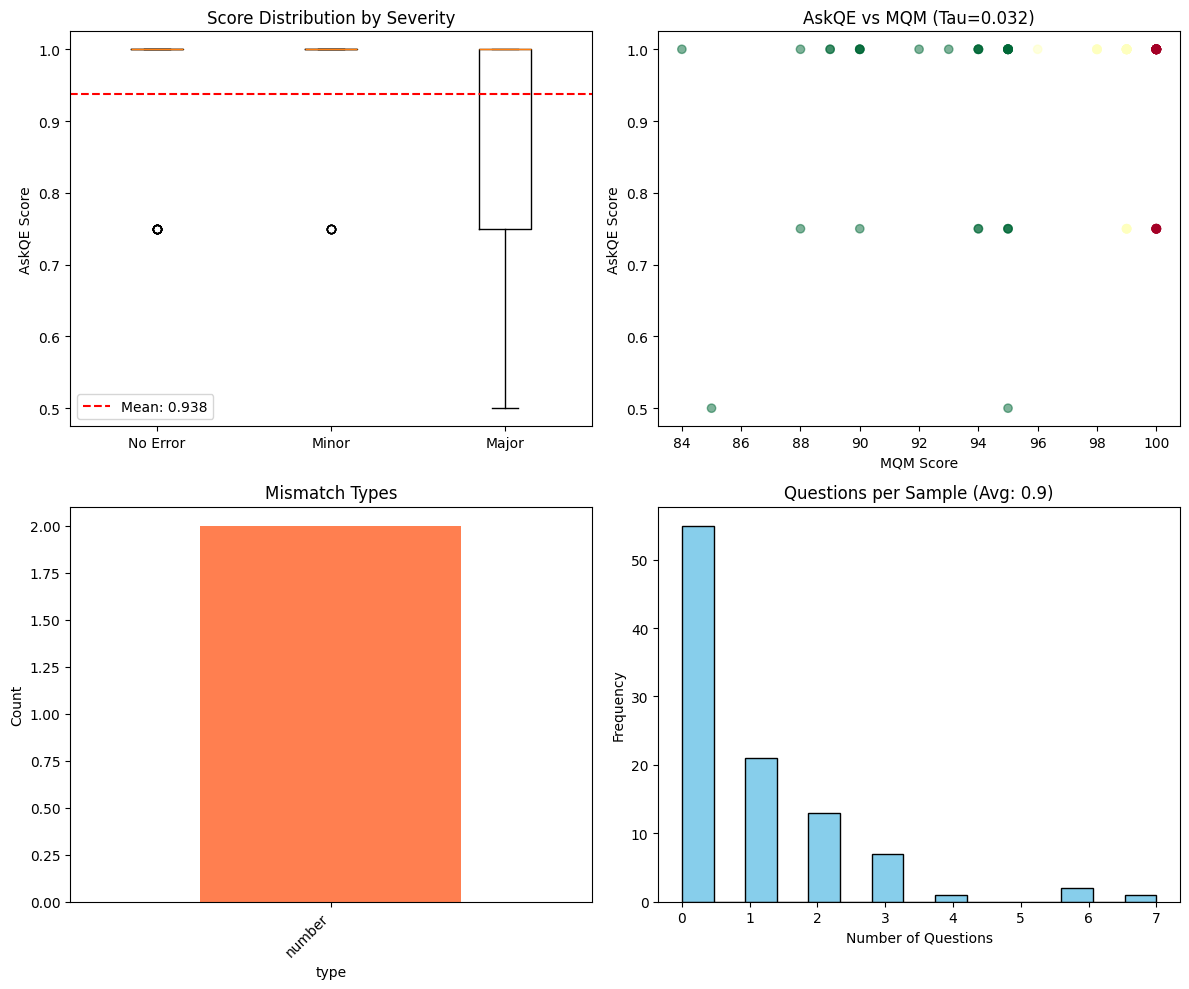

In [61]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Score by Severity (Box Plot)
ax1 = axes[0, 0]
severity_groups = [df[df["severity"] == s]["askqe_score"].dropna() for s in ["No Error", "Minor", "Major"]]
ax1.boxplot(severity_groups, labels=["No Error", "Minor", "Major"])
ax1.set_ylabel("AskQE Score")
ax1.set_title("Score Distribution by Severity")
ax1.axhline(y=df["askqe_score"].mean(), color='r', linestyle='--', label=f'Mean: {df["askqe_score"].mean():.3f}')
ax1.legend()

# 2. Score vs MQM Score (Scatter)
ax2 = axes[0, 1]
ax2.scatter(df["mqm_score"], df["askqe_score"], alpha=0.5, c=df["severity"].cat.codes, cmap="RdYlGn")
ax2.set_xlabel("MQM Score")
ax2.set_ylabel("AskQE Score")
ax2.set_title(f"AskQE vs MQM (Tau={tau:.3f})")

# 3. Mismatch Type Distribution (Bar)
ax3 = axes[1, 0]
if all_mismatches:
    mismatch_df["type"].value_counts().plot(kind="bar", ax=ax3, color="coral")
    ax3.set_title("Mismatch Types")
    ax3.set_ylabel("Count")
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 4. Questions per Sample (Histogram)
ax4 = axes[1, 1]
ax4.hist(df["num_questions"], bins=15, color="skyblue", edgecolor="black")
ax4.set_xlabel("Number of Questions")
ax4.set_ylabel("Frequency")
ax4.set_title(f"Questions per Sample (Avg: {df['num_questions'].mean():.1f})")

plt.tight_layout()
plt.show()

##Save Results

In [ ]:
# Save to JSON
output_file = "extension_results.json"
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(results, f, ensure_ascii=False, indent=2)
print(f"✅ Results saved to {output_file}")

# Save summary to CSV
summary_df = df[["row_id", "id", "severity", "mqm_score", "num_questions", "num_mismatches", "askqe_score"]]
summary_df.to_csv("extension_summary.csv", index=False)
print(f"✅ Summary saved to extension_summary.csv")

# Final Summary
print("\n" + "="*60)
print("📋 FINAL SUMMARY")
print("="*60)
print(f"""
Extension Pipeline Results:
- Total Samples: {len(df)}
- Mean AskQE Score: {df['askqe_score'].mean():.3f}
- Samples with Errors Detected: {len(errors_df)} ({100*len(errors_df)/len(df):.1f}%)
- Avg Questions/Sample: {df['num_questions'].mean():.1f}
- Correlation (Kendall Tau): {tau:.4f}

Top Mismatch Types:
{mismatch_df['type'].value_counts().head(3).to_string() if all_mismatches else 'None'}
""")

In [86]:
# ============================================
# 🔍 DEBUG: Check Atomic Facts Coverage
# ============================================

# Count samples with/without atomic facts
with_facts = 0
without_facts = 0
total_facts = 0

for entry in dataset:
    facts = entry.get("atomic_facts", [])
    if facts and len(facts) > 0:
        with_facts += 1
        total_facts += len(facts)
    else:
        without_facts += 1

print(f"📊 Atomic Facts Coverage:")
print(f"   Samples WITH facts: {with_facts} ({100*with_facts/len(dataset):.1f}%)")
print(f"   Samples WITHOUT facts: {without_facts} ({100*without_facts/len(dataset):.1f}%)")
print(f"   Total facts: {total_facts}")
print(f"   Avg facts per sample (all): {total_facts/len(dataset):.2f}")
print(f"   Avg facts per sample (with facts): {total_facts/with_facts:.2f}" if with_facts > 0 else "")

# Show some examples without facts
print(f"\n🔍 Examples WITHOUT atomic facts:")
count = 0
for i, entry in enumerate(dataset):
    if not entry.get("atomic_facts"):
        print(f"   [{i}] {entry['source'][:60]}...")
        count += 1
        if count >= 3:
            break

📊 Atomic Facts Coverage:
   Samples WITH facts: 81 (81.0%)
   Samples WITHOUT facts: 19 (19.0%)
   Total facts: 132
   Avg facts per sample (all): 1.32
   Avg facts per sample (with facts): 1.63

🔍 Examples WITHOUT atomic facts:
   [18] Objective: the present study aimed to develop and validate a...
   [19] Children or their caregivers were asked to complete the FFQ ...
   [20] Four 24-HRs were collected weekly over one month....
